### Data Tell Us
* The highest revenue from product category is Classic Cars.
* The higest revenue by year is 2004(but the data for 2005 comprises only five months), and the main contributor is USA, France and Spain. 
* Notably, upon closer examination of the monthly data, we observe that the revenue from January to May surpasses that of both 2003 and 2004.
* The highest revenue by month is November.
* About 45% of revenue comes from top 20 % customers.
* Approximately 90% of the revenue in November comes from the top 20% of customers.
* The sales in Belguim is growing fastest(2003-2004). 


In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv',index_col='ORDERNUMBER',encoding='Latin-1')

In [2]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Get the information of the Data Frame**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   object 


**The Percentage of NULL value**

In [4]:
df.isnull().sum()/len(df)*100

QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

Drop the useless columns(such as personal information, null data is above 50%)

In [5]:
df.drop(['ORDERLINENUMBER','STATUS','QTR_ID','PRODUCTCODE','PHONE','ADDRESSLINE2','STATE',
           'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 10107 to 10414
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   object 
 4   MONTH_ID         2823 non-null   int64  
 5   YEAR_ID          2823 non-null   int64  
 6   PRODUCTLINE      2823 non-null   object 
 7   MSRP             2823 non-null   int64  
 8   CUSTOMERNAME     2823 non-null   object 
 9   ADDRESSLINE1     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 308.8+ KB


In [6]:
df.head()
# df.DEALSIZE.unique()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003 0:00,2,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,Small
10121,34,81.35,2765.90,5/7/2003 0:00,5,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,France,Small
10134,41,94.74,3884.34,7/1/2003 0:00,7,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,France,Medium
10145,45,83.26,3746.70,8/25/2003 0:00,8,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,USA,Medium
10159,49,100.00,5205.27,10/10/2003 0:00,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,USA,Medium


In [7]:
color = [
    '#1f77b4', '#aec7e8', '#ffbb78', 
    '#98df8a', '#ff9896', '#c5b0d5', 
    '#c49c94', '#e377c2', '#f7b6d2', 
    '#7f7f7f','#c7c7c7', '#bcbd22', '#dbdb8d', 
]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Apply the custom tick formatter to the y-axis
def analysis__target_column_to_sales(df,target_col,top_n=None,asc=False,title=None):

    result = df.groupby(target_col)['SALES'].sum()
    result_df = result.reset_index()
    if top_n:
        df_sorted = result_df.sort_values(by='SALES', ascending=asc)
        # Specify the number of top values to display
        result_df = df_sorted.head(top_n)
        
    plt.figure(figsize=(20,7))

    # Add title
    if title:
        plt.title("Summation of Sales Price by "+target_col+'('+str(title)+')',fontsize=20)
    else:
        plt.title("Summation of Sales Price by "+target_col,fontsize=20)

    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Sale',fontsize=14)
    plt.xlabel(target_col,fontsize=14)
    ax=sns.barplot(x=result_df[target_col], y=result_df['SALES'],palette=color)
    for bar in ax.containers:
        ax.bar_label(bar, label_type='edge', fontsize=14,labels=[f'{value / 1e6:.2f}M' for value in result_df['SALES']])


In [9]:
def target_col_by_year_pie_plot(df,target_col,top_n=None):
    unique_years = df['YEAR_ID'].unique()

    # Create subplots for each year
    fig, axes = plt.subplots(1, len(unique_years)+1, figsize=(20,8))
    for i, year in enumerate(unique_years):
        year_data = df[df['YEAR_ID'] == year]
        sales_by_target = year_data.groupby(target_col)['SALES'].sum()
        sales_by_target=sales_by_target.reset_index()
        sales_by_target=sales_by_target.sort_values(by='SALES',ascending=False)
        if top_n:
            sales_by_target=sales_by_target.head(top_n)
        axes[i].pie(sales_by_target['SALES'], labels=sales_by_target[target_col], autopct='%1.1f%%', startangle=60 ,textprops={'fontsize': 12},colors = color)
        axes[i].set_title(f'{year}',fontsize=16)
    
    sales_by_product=df.groupby(target_col)['SALES'].sum()
    sales_by_target=sales_by_target.reset_index()
    sales_by_target=sales_by_target.sort_values(by='SALES',ascending=False)
    if top_n:
        sales_by_target=sales_by_target.head(top_n)
    axes[3].pie(sales_by_target['SALES'], labels=sales_by_target[target_col], autopct='%1.1f%%', startangle=60 ,textprops={'fontsize': 12},colors = color)
    axes[3].set_title('Total',fontsize=16)

    # Display the subplots
    plt.show()

#### We can see that the year revenue at 2004 is higher than 2003 and 2005, but only have 5 months data in 2005.

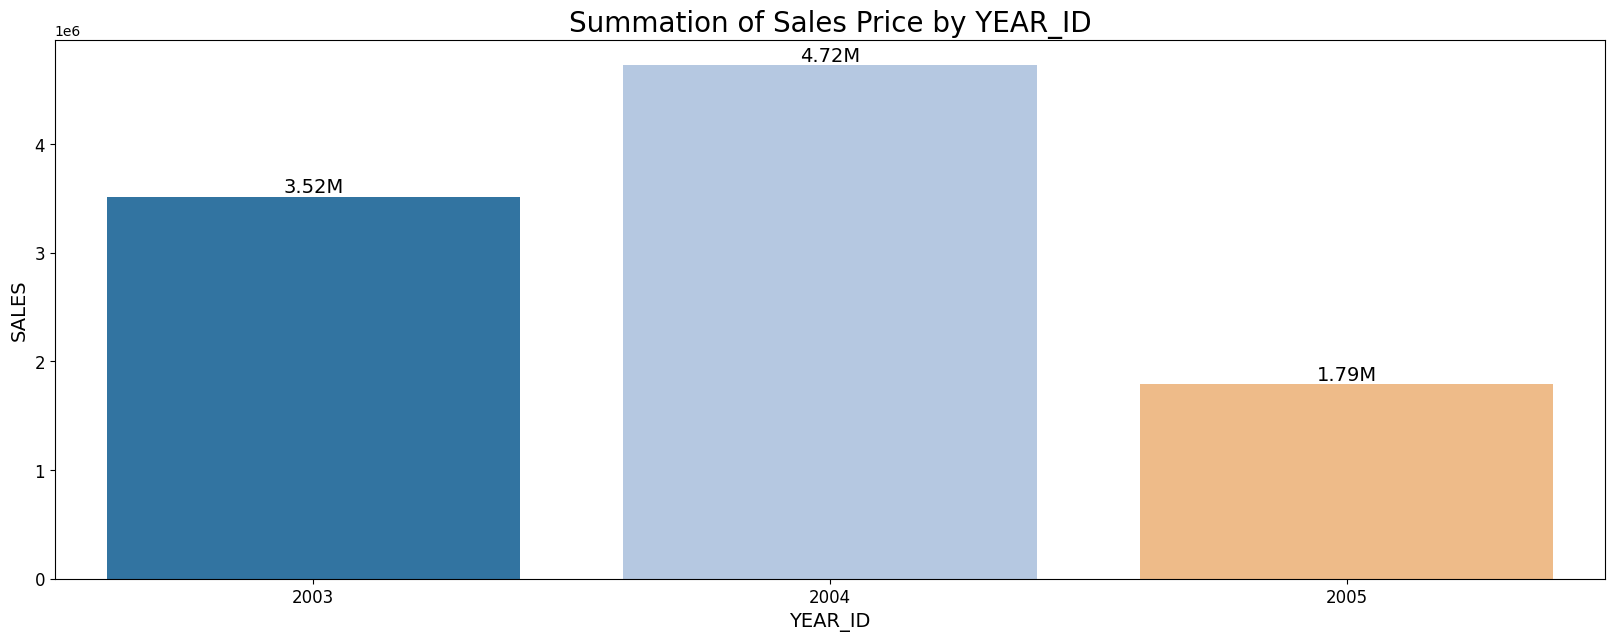

In [10]:
analysis__target_column_to_sales(df,'YEAR_ID')

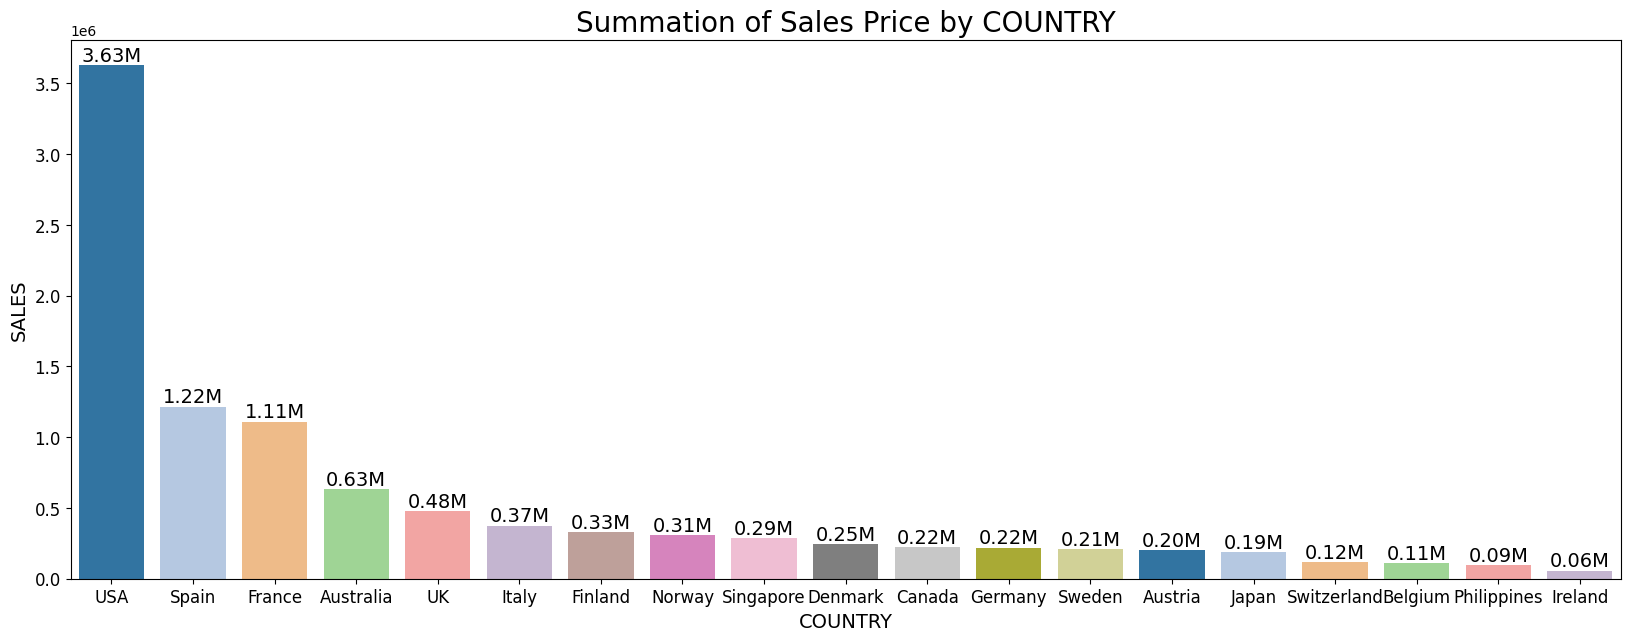

In [11]:
analysis__target_column_to_sales(df,'COUNTRY',top_n=20)

#### The highest contributors in 2004 were USA and France.
#### Despite accounting for a small proportion, Belgium recorded the highest Revenue Growth Rate in 2004.
#### In 2005, nearly all countries had negative growth rate.(But it is wrong, because we just have 1-5 month data in 2005, we will discuss it later)


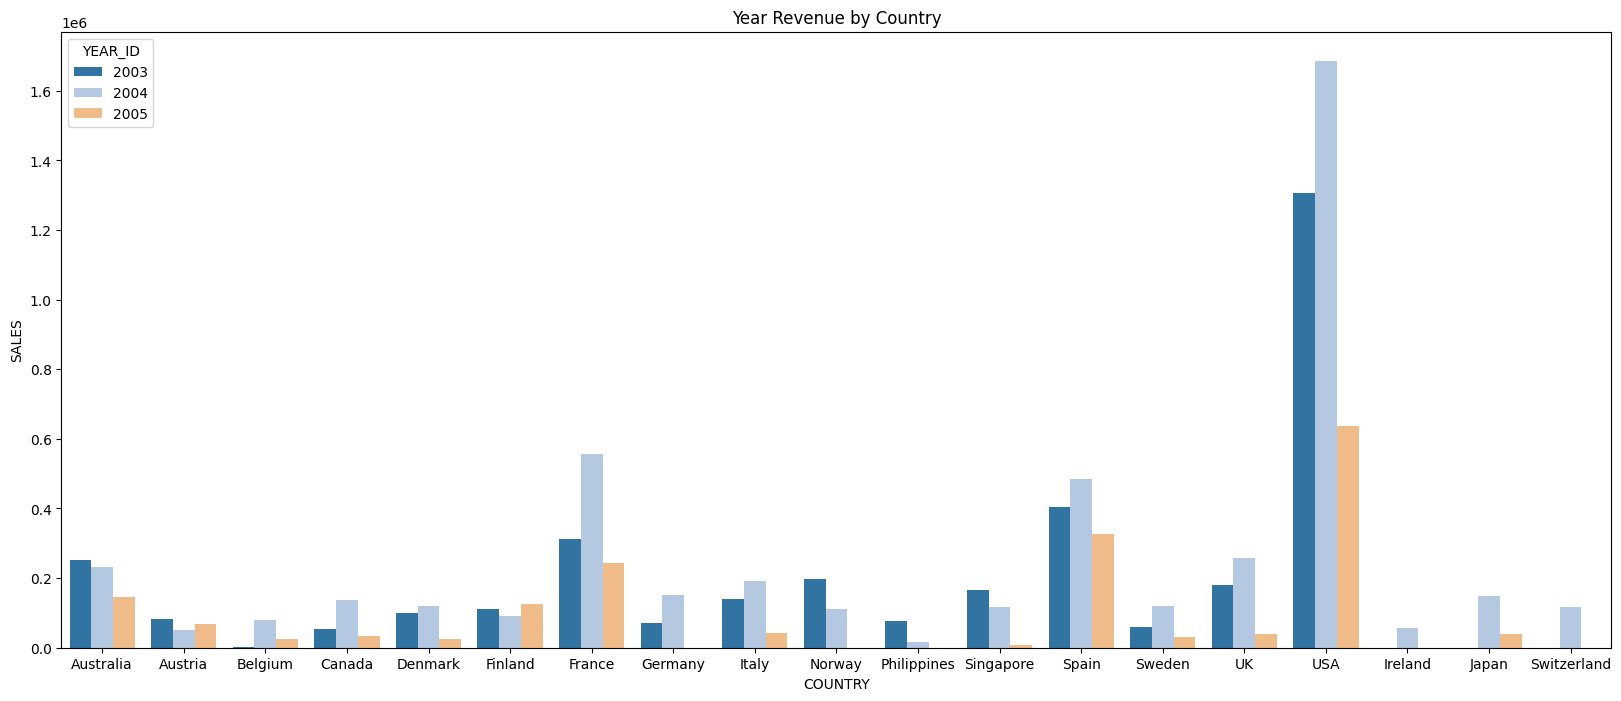

In [12]:
unique_years = df['YEAR_ID'].unique()
temp=pd.DataFrame()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('COUNTRY')['SALES'].sum()
    new_data=year_data
    new_data=pd.DataFrame(new_data.reset_index())
    new_data['YEAR_ID'] = year
    temp = pd.concat([temp,new_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.title("Year Revenue by Country") # add title 
a= sns.barplot(x='COUNTRY',y='SALES',data=temp,hue='YEAR_ID',errorbar=None,palette=color)
plt.show()


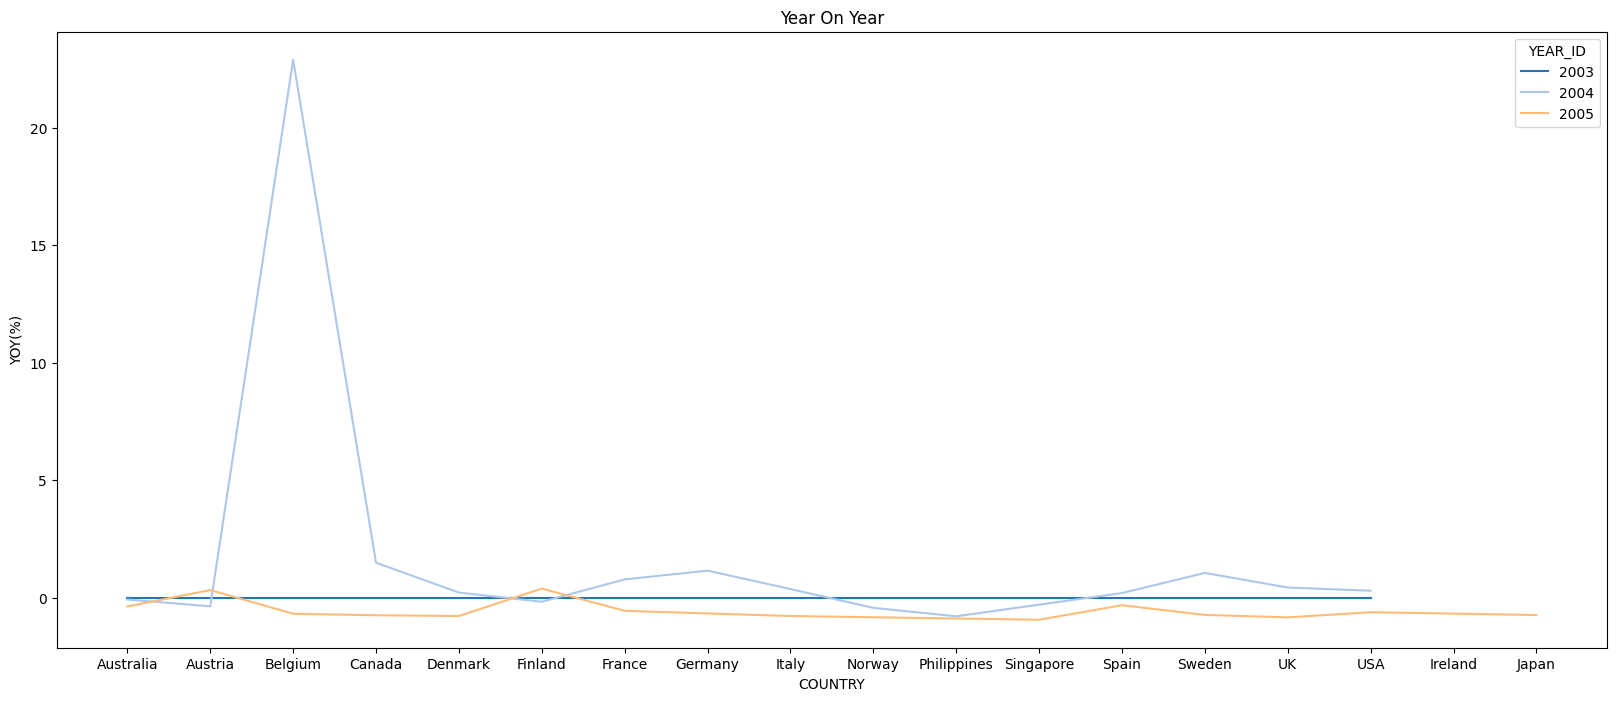

In [13]:
import warnings
warnings.filterwarnings("ignore")

unique_years = df['YEAR_ID'].unique()
base_data = df[df['YEAR_ID'] == 2003]
base_data=base_data.groupby('COUNTRY')['SALES'].sum()
temp=pd.DataFrame()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('COUNTRY')['SALES'].sum()
    new_data=(year_data-base_data)/base_data
    new_data=pd.DataFrame(new_data.reset_index())
    new_data['YEAR_ID'] = year
    temp = pd.concat([temp,new_data], ignore_index=True)
    base_data=year_data
plt.figure(figsize=(20,8))
plt.xlabel('COUNTRY')
plt.ylabel('YOY(%)')
plt.title("Year On Year") # add title 
a= sns.lineplot(x='COUNTRY',y='SALES',data=temp,hue='YEAR_ID',palette=color,errorbar=None)
plt.show()


In [14]:
import plotly.express as px

cou1 = px.treemap(df,path=['YEAR_ID','COUNTRY'],values='SALES',
                 height = 600,width = 800)

cou1.show()

#### When analyzing the annual revenue data alone, it may appear that 2005 was a dismal year. 
#### However, it's crucial to consider that our dataset for 2005 comprises only five months. 
#### Notably, upon closer examination of the monthly data, we observe that the revenue from January to May surpasses that of both 2003 and 2004.

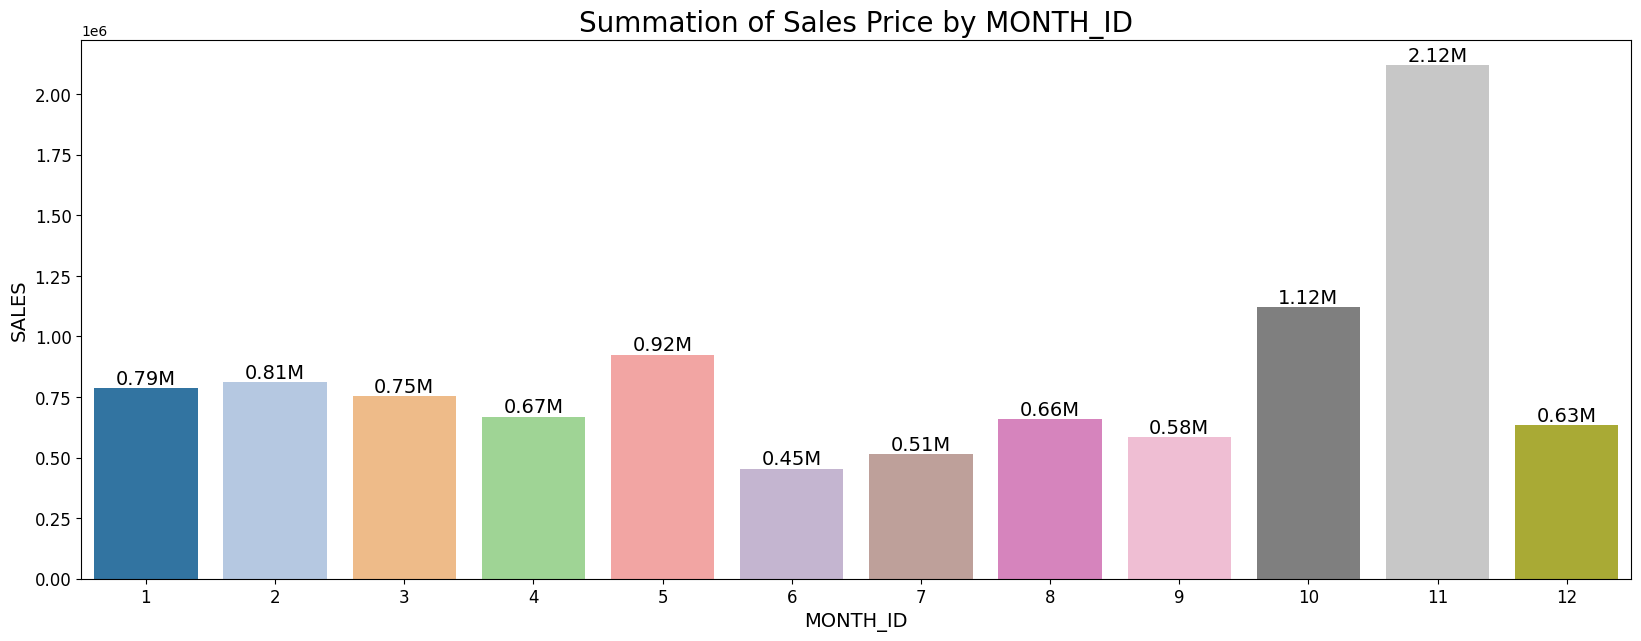

In [15]:
analysis__target_column_to_sales(df,'MONTH_ID')

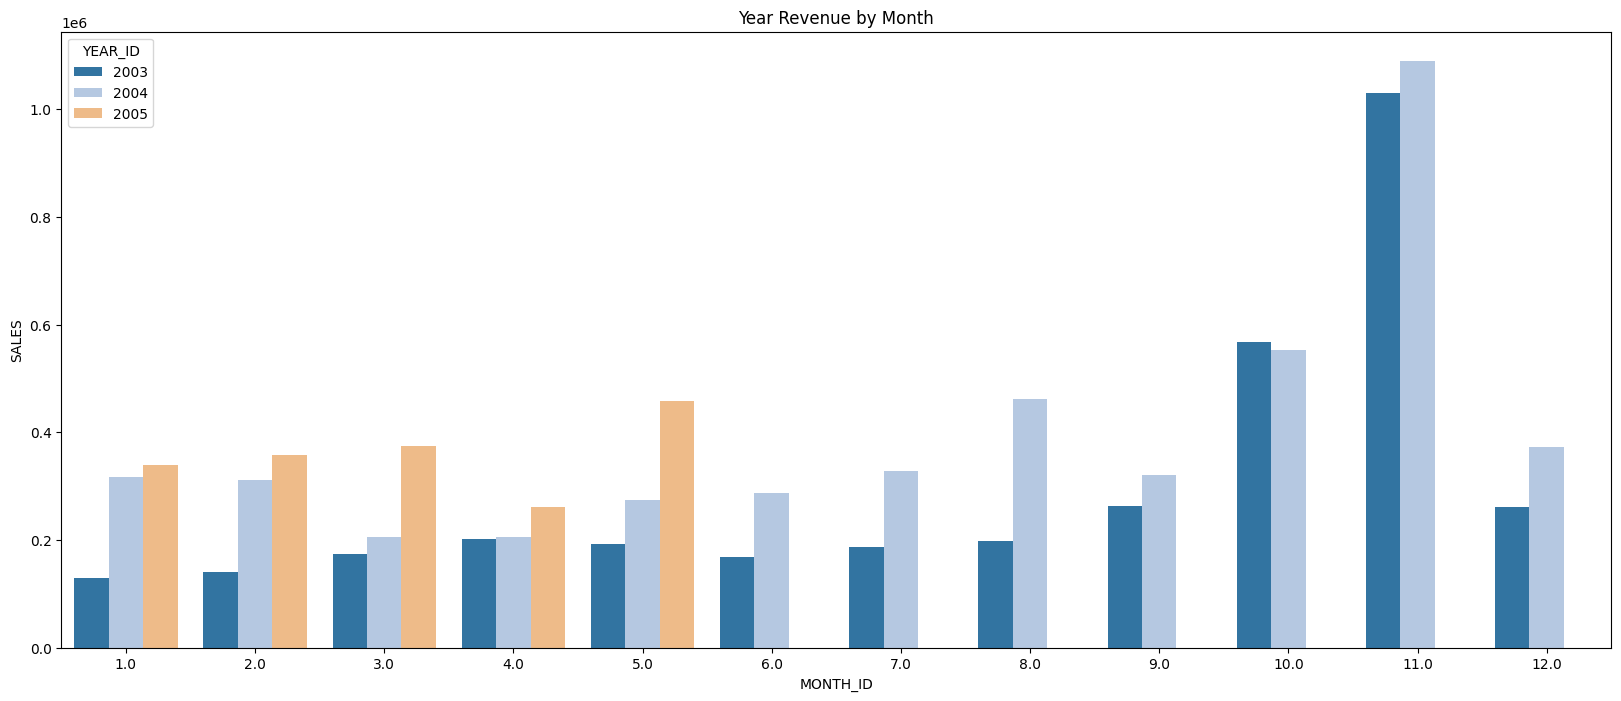

In [16]:
unique_years = df['YEAR_ID'].unique()

# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('MONTH_ID')['SALES'].sum()
    new_data=year_data
    new_data=pd.DataFrame(new_data.reset_index())
    new_data['YEAR_ID'] = year
    temp = pd.concat([temp,new_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.title("Year Revenue by Month") # add title 
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

a= sns.barplot(x='MONTH_ID',y='SALES',data=temp,hue='YEAR_ID',errorbar=None,palette=color)
plt.show()


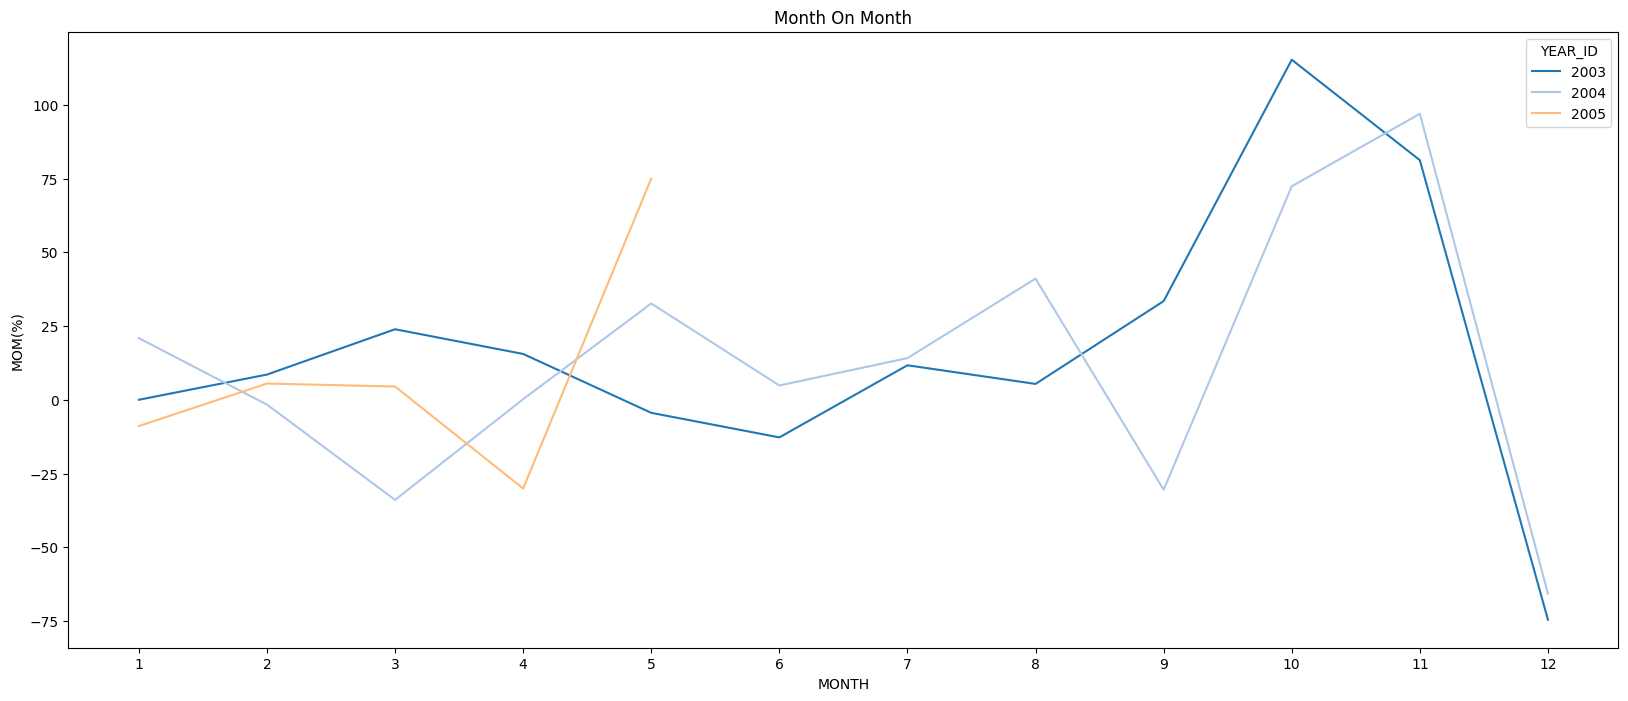

In [17]:
unique_years = df['YEAR_ID'].unique()
unique_months = df['MONTH_ID'].unique()

base_data = df[df['YEAR_ID'] == 2003]
base_data=base_data.groupby('MONTH_ID')['SALES'].sum()
base_data=base_data[1]
temp=pd.DataFrame()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('MONTH_ID')['SALES'].sum()
    new_data=[]
    for i, month in enumerate(unique_months):
        try:
            new_data.append(round((year_data[i+1]-base_data)/base_data*100,2))
            base_data=year_data[i+1]
        except:
            break 
    new_data=pd.DataFrame(new_data)
    new_data['YEAR_ID'] = year
    mon=[1,2,3,4,5,6,7,8,9,10,11,12]
    new_data['MONTH_ID'] =mon[0:len(new_data)]
    temp = pd.concat([temp,new_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.xlabel('MONTH')
plt.ylabel('MOM(%)')
plt.title("Month On Month") # add title 
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
a= sns.lineplot(x='MONTH_ID',y=0,data=temp,hue='YEAR_ID',palette=color,errorbar=None)
plt.show()


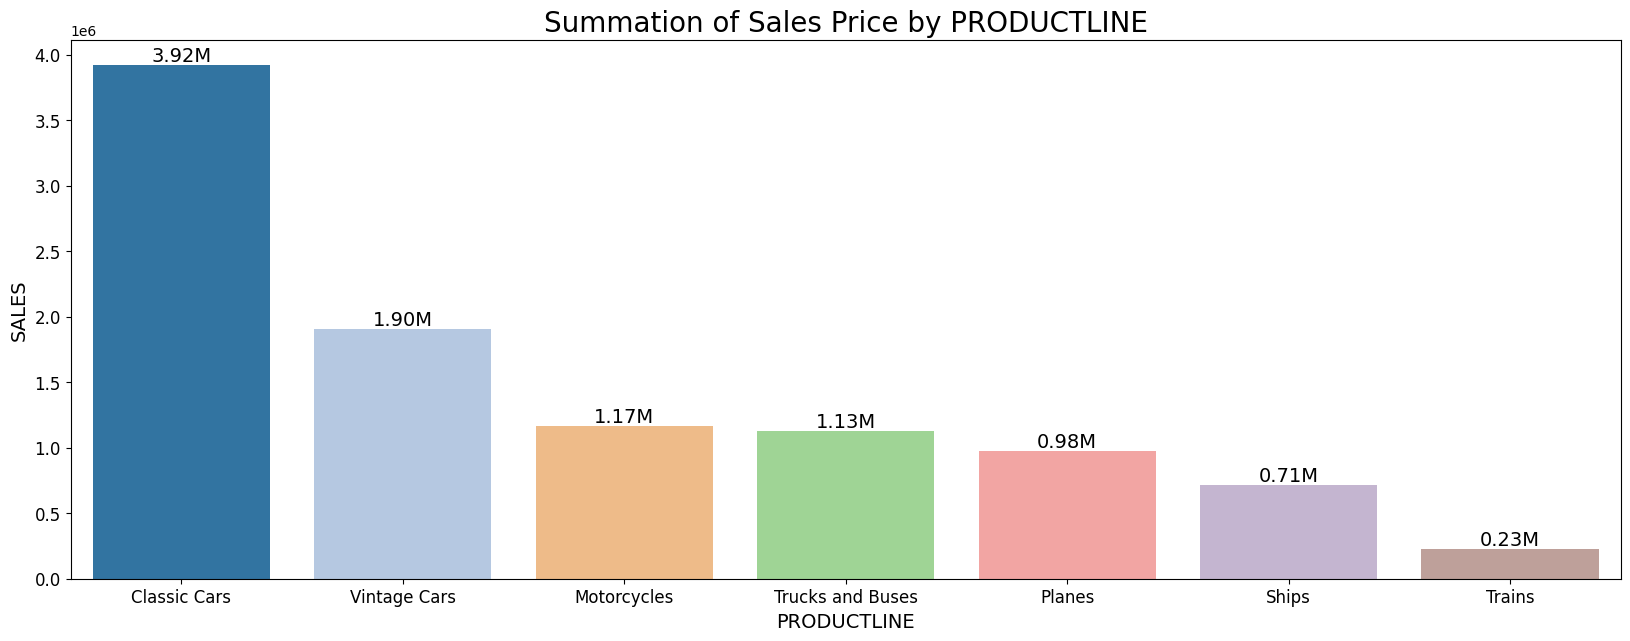

In [18]:
analysis__target_column_to_sales(df,'PRODUCTLINE',top_n=10)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
def stack_box_plot_by_productline(df,group,index):
    result = df.groupby(group)['SALES'].sum()
    result_df = result.reset_index()
    # result_df
    pivot_df = result_df.pivot(index=index, columns='PRODUCTLINE', values='SALES')
    pivot_df
    bar = pivot_df.plot(kind='bar', stacked=True, figsize=(20, 8),cmap='tab20c')

    # Add labels and a legend
    plt.xlabel('YEAR_ID',fontsize=14)
    plt.ylabel('Sales',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title('Stacked Bar Plot by PRODUCTLINE',fontsize=20)
    plt.legend(title='Values', loc='upper right')

    plt.show()


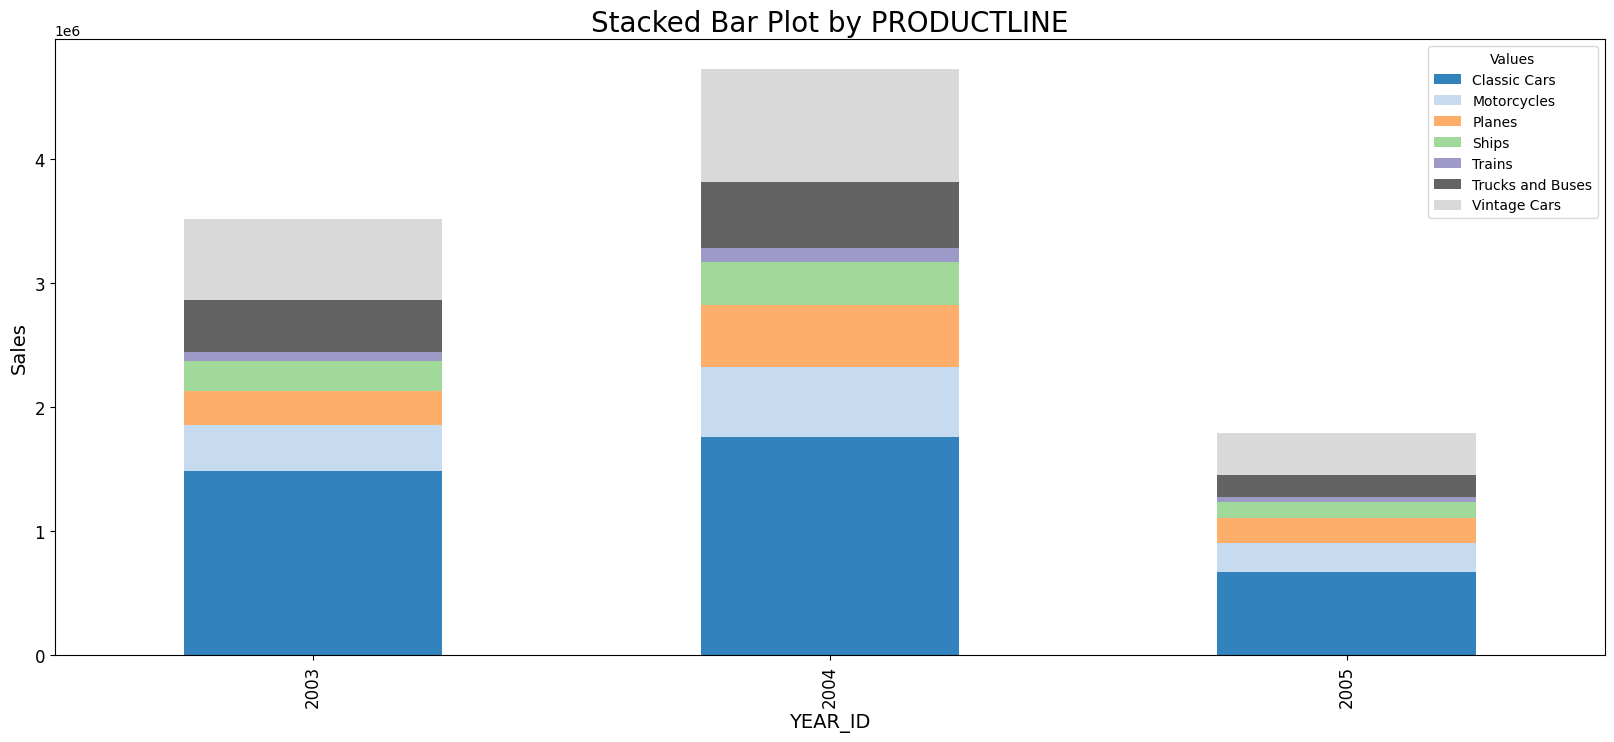

In [20]:
stack_box_plot_by_productline(df,['YEAR_ID','PRODUCTLINE'],'YEAR_ID')

### **We observe consistent sales percentages by category across different years.**



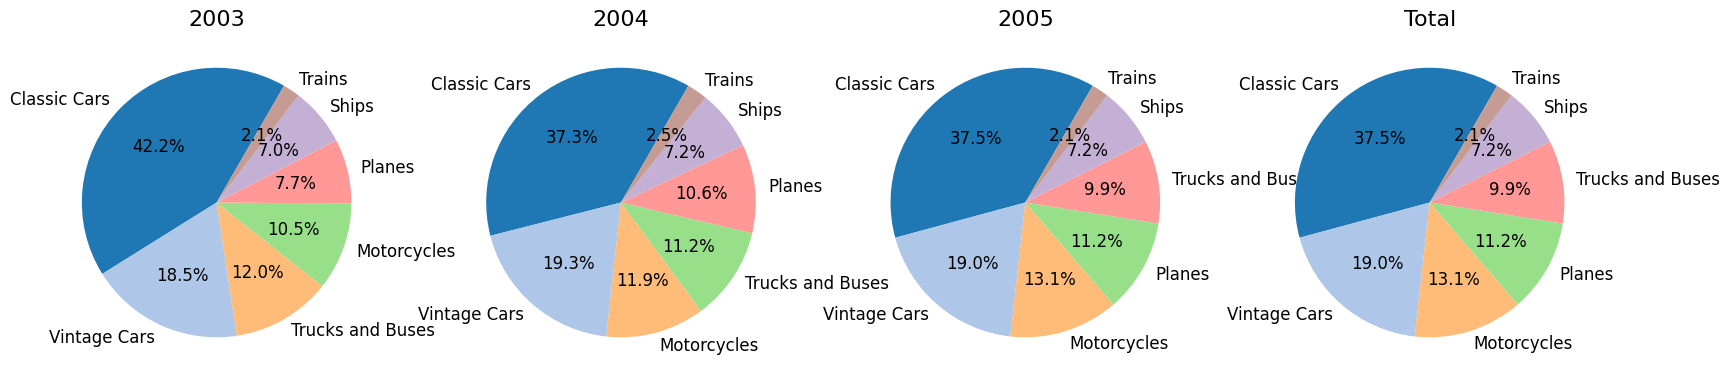

In [21]:
target_col_by_year_pie_plot(df,'PRODUCTLINE')

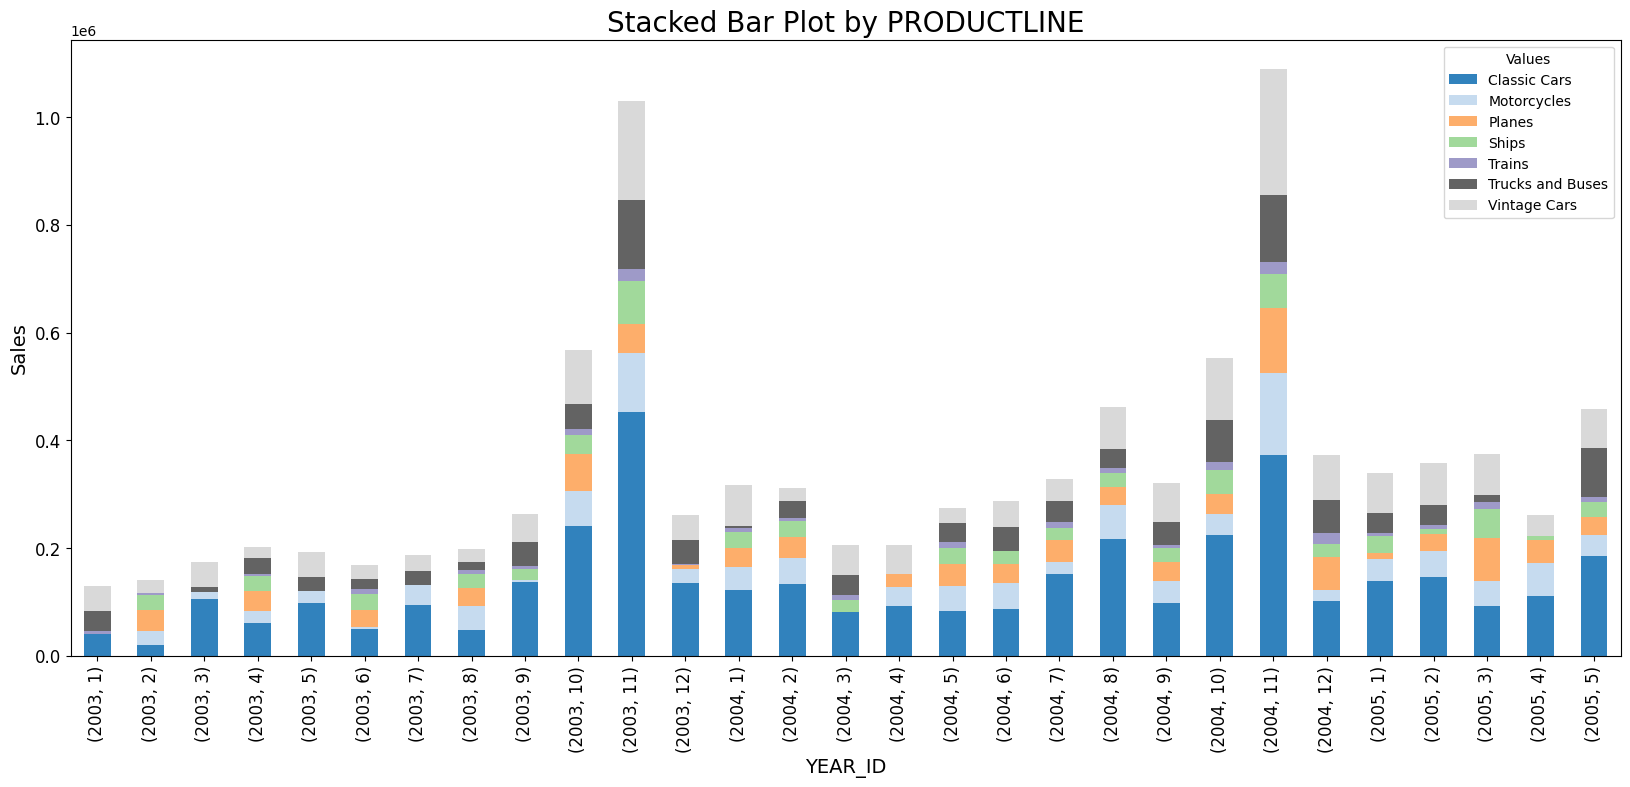

In [22]:
stack_box_plot_by_productline(df,['YEAR_ID','MONTH_ID','PRODUCTLINE'],['YEAR_ID','MONTH_ID'])


### The top n clients account for a proportion of the total revenue

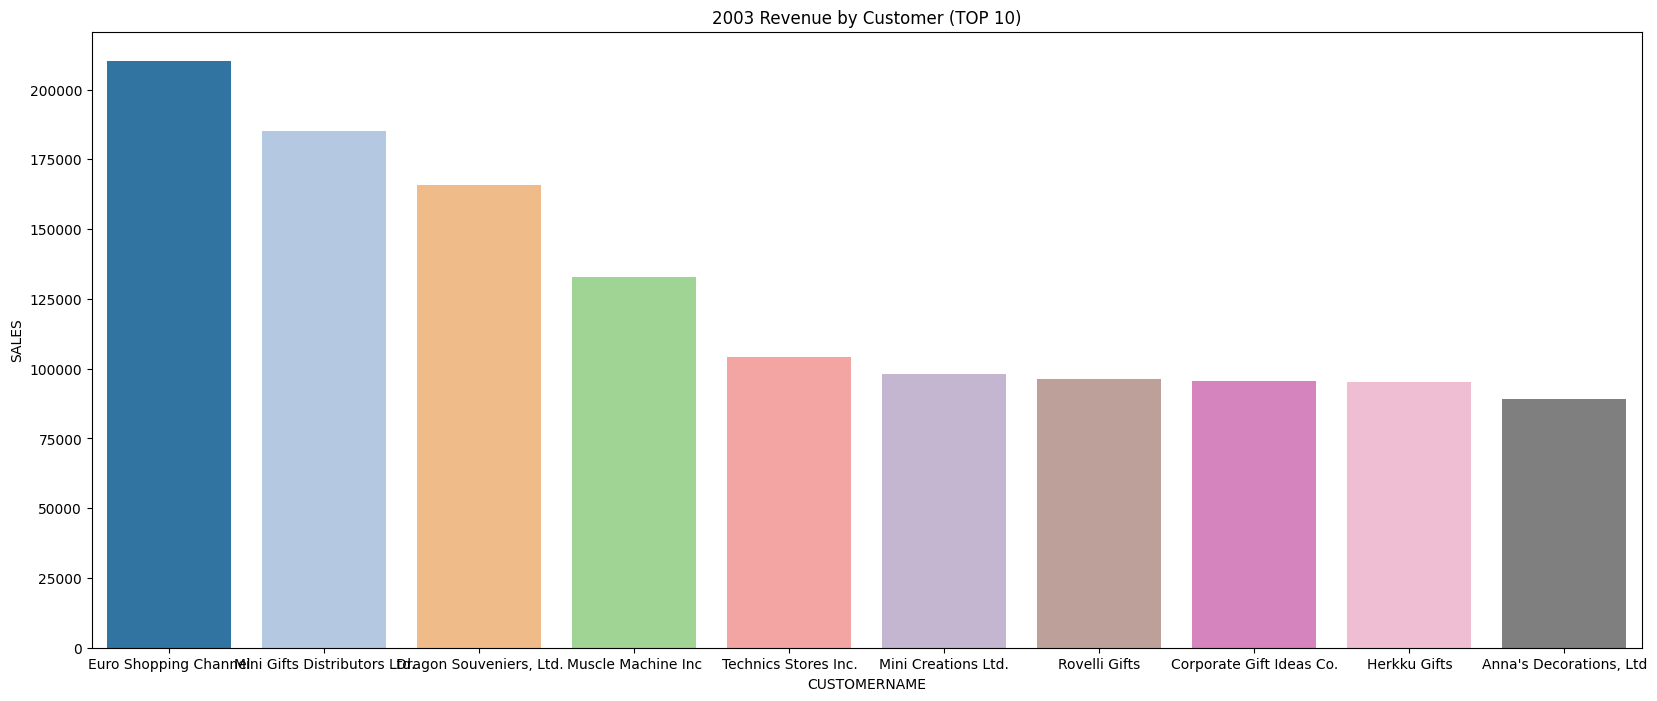

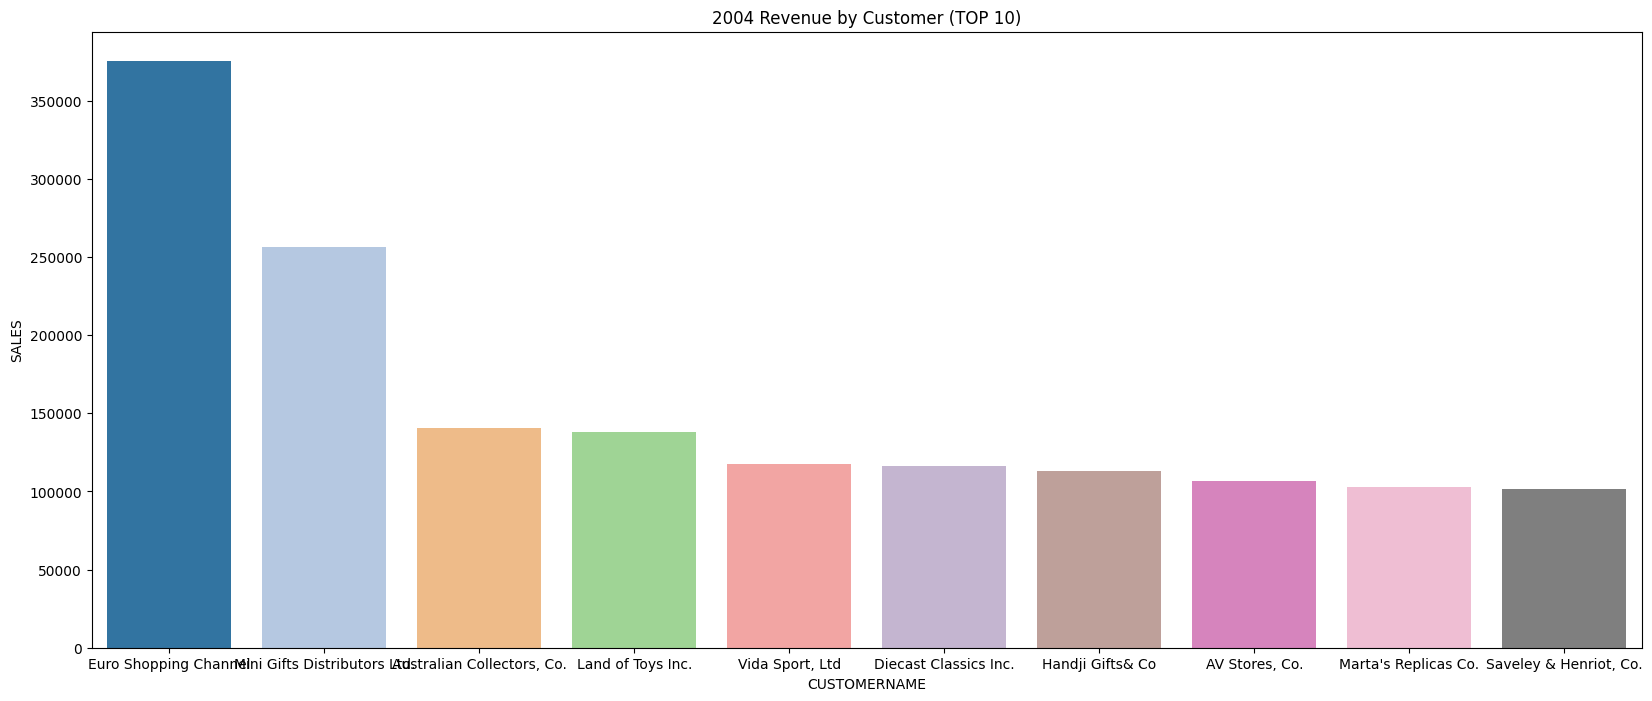

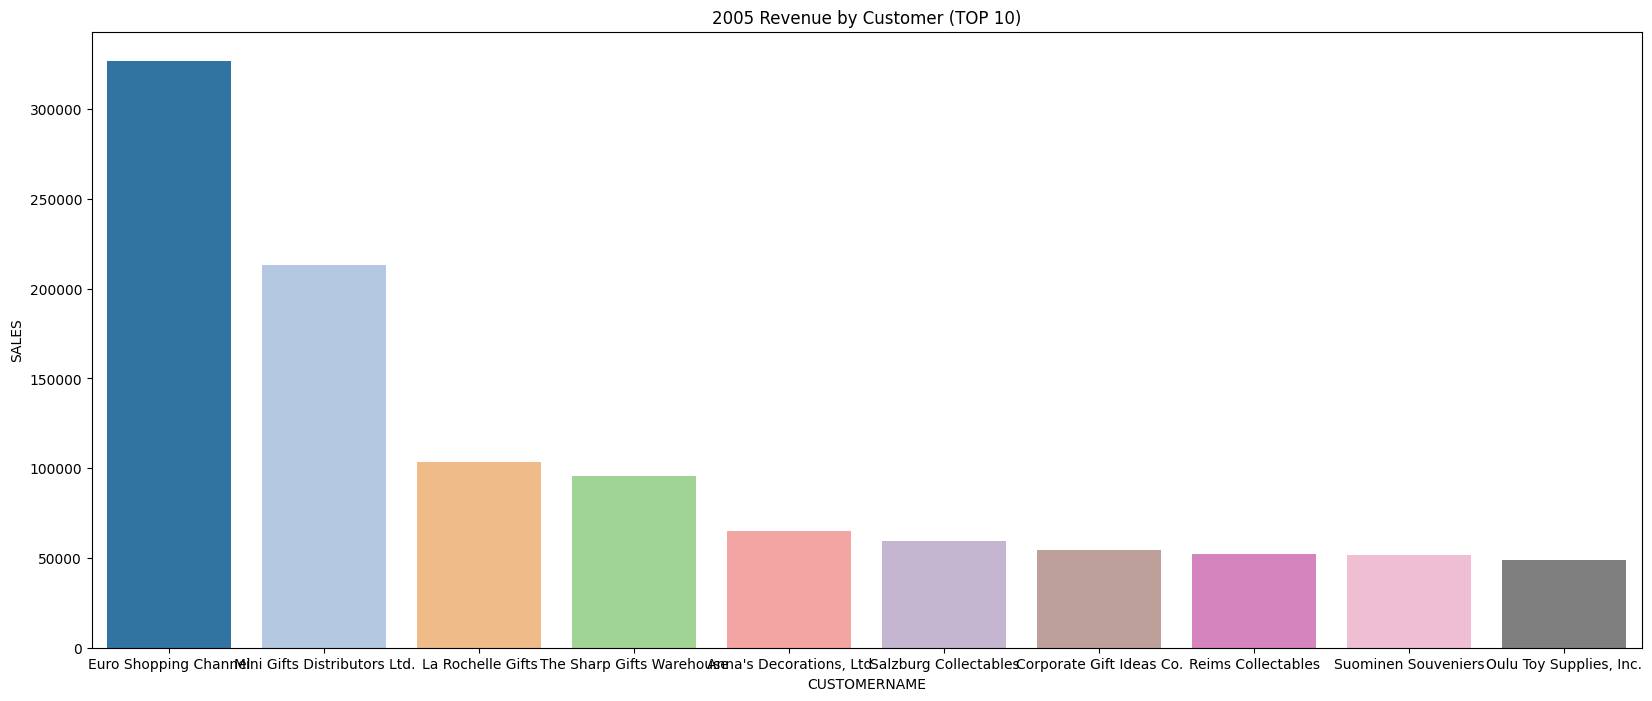

In [23]:
unique_years = df['YEAR_ID'].unique()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum()
    new_data=year_data
    new_data=pd.DataFrame(new_data.reset_index())
    new_data['YEAR_ID'] = year
    plt.figure(figsize=(20,8))
    plt.title(str(year)+" Revenue by Customer (TOP 10)") # add title 
    new_data =new_data.sort_values(by='SALES',ascending=False)
    new_data=new_data.head(10)
    a= sns.barplot(x='CUSTOMERNAME',y='SALES',data=new_data,errorbar=None,palette=color)
    plt.show()


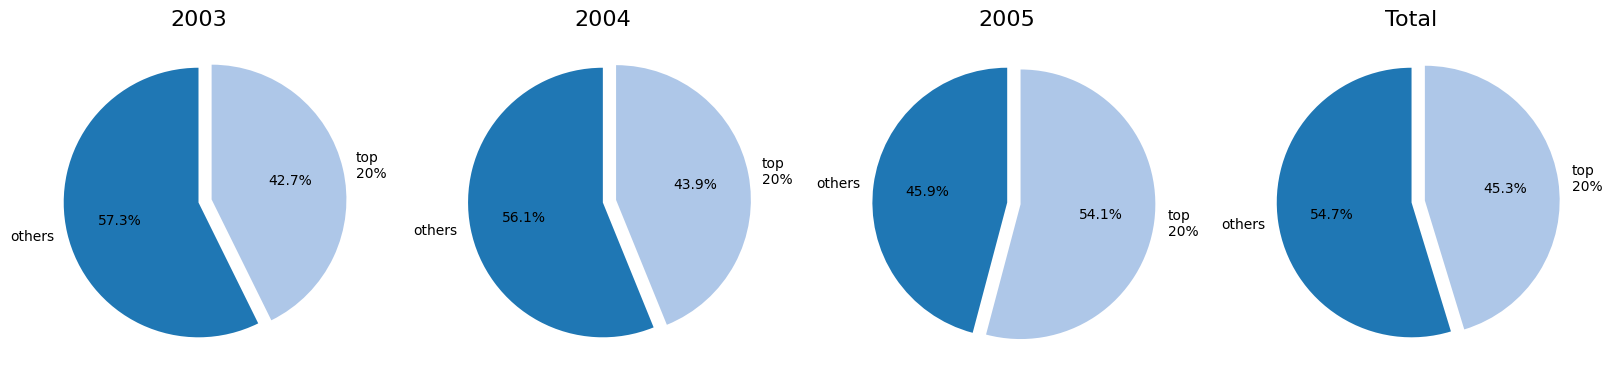

In [24]:
unique_years = df['YEAR_ID'].unique()
# Create subplots for each year
ratio=0.20
fig, axes = plt.subplots(1, len(unique_years)+1, figsize=(20,8))
all_sum=0
top_sum=0
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum()
    n=int(ratio*len(year_data.index))

    revenue= year_data.sum()
    new_data=year_data
    new_data=pd.DataFrame(new_data.reset_index())
    new_data['YEAR_ID'] = year
    
    new_data =new_data.sort_values(by='SALES',ascending=False)
    new_data=new_data.head(n)
    top_n= new_data.sum()
    
    all_sum+=revenue
    top_sum+=top_n['SALES']
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    sizes=[revenue-top_n['SALES'],top_n['SALES']]
    labels = ['others','top\n'+str(int(ratio*100))+'%']

    axes[i].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            startangle=90,colors = color)
    axes[i].set_title(str(year),fontsize=16)

explode = (0, 0.1) 
sizes=[all_sum-top_sum,top_sum]
labels = ['others','top\n'+str(int(ratio*100))+'%']

axes[3].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90,colors = color)
axes[3].set_title('Total',fontsize=16)
plt.show()

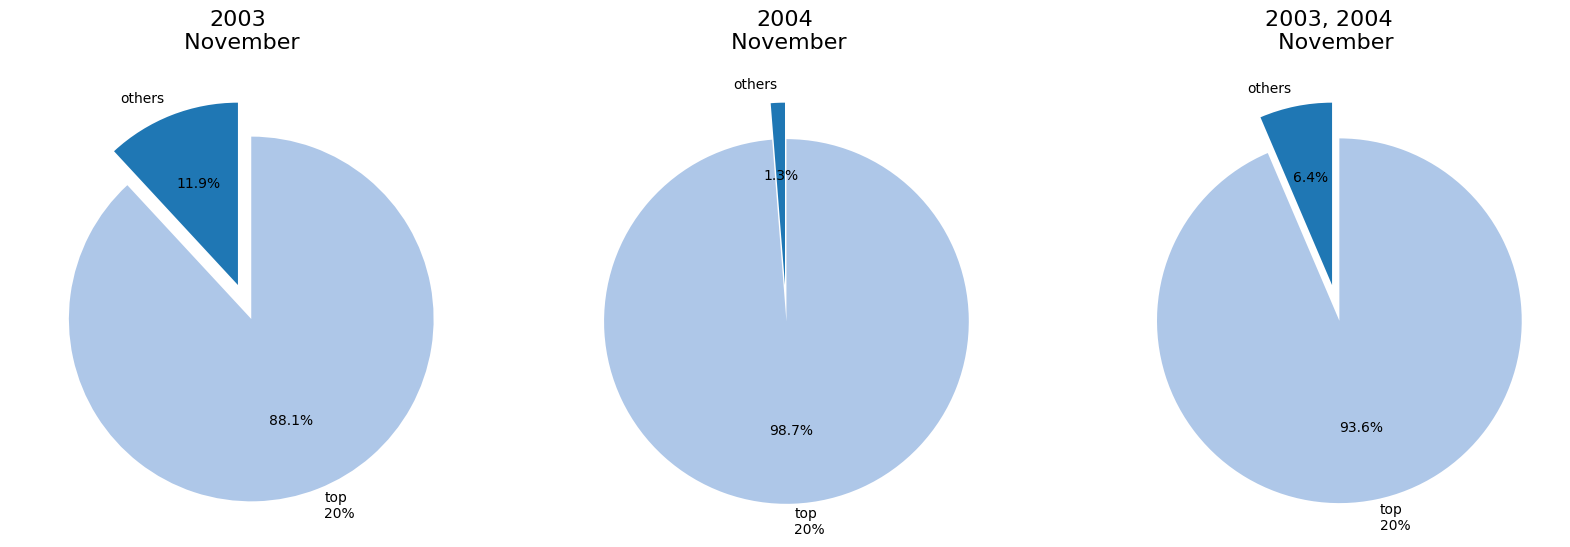

In [25]:
unique_years = df['YEAR_ID'].unique()
# Create subplots for each year
ratio=0.20
fig, axes = plt.subplots(1, len(unique_years), figsize=(20,8))
all_sum=0
top_sum=0
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby(['MONTH_ID','CUSTOMERNAME'])['SALES'].sum()

    n=int(ratio*len(year_data.index))

    new_data=year_data
    new_data=pd.DataFrame(new_data.reset_index())
    new_data=new_data[new_data['MONTH_ID'] == 11]
    new_data['YEAR_ID'] = year
    revenue= new_data['SALES'].sum()
    new_data =new_data.sort_values(by='SALES',ascending=False)
    
    new_data=new_data.head(n)
    top_n= new_data['SALES'].sum()
    all_sum+=revenue
    top_sum+=top_n
    explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
    if revenue!=0:
        sizes=[revenue-top_n,top_n]
        labels = ['others','top\n'+str(int(ratio*100))+'%']
        axes[i].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                startangle=90,colors = color)
        axes[i].set_title(str(year)+'\n November',fontsize=16)

explode = (0, 0.2) 
sizes=[all_sum-top_sum,top_sum]
labels = ['others','top\n'+str(int(ratio*100))+'%']

axes[2].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90,colors = color)
axes[2].set_title('2003, 2004 \n November',fontsize=16)
plt.show()